<a href="https://colab.research.google.com/github/Isenlith/ANASIN-II/blob/master/Wavelet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nome: Leandro da Silva de Souza

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import upfirdn

## Gerando o sinal

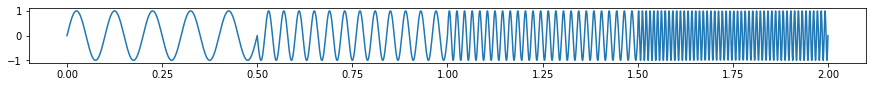

In [133]:
plt.rcParams["figure.figsize"] = (15, 1)

f2 = 1024
tf = 2

t1 = np.linspace(0, tf/4, 1000)
x1 = np.sin(2*np.pi*10*t1)
t2 = np.linspace(tf/4, 2*tf/4, 1000)
x2 = np.sin(2*np.pi*25*t2)
t3 = np.linspace(2*tf/4, 3*tf/4, 1000)
x3 = np.sin(2*np.pi*50*t3)
t4 = np.linspace(3*tf/4, tf, 1000)
x4 = np.sin(2*np.pi*100*t4)

x = x1.tolist() + x2.tolist() + x3.tolist() + x4.tolist()
t = t1.tolist() + t2.tolist() + t3.tolist() + t4.tolist()

plt.plot(t, x);

## Decompondo do sinal 

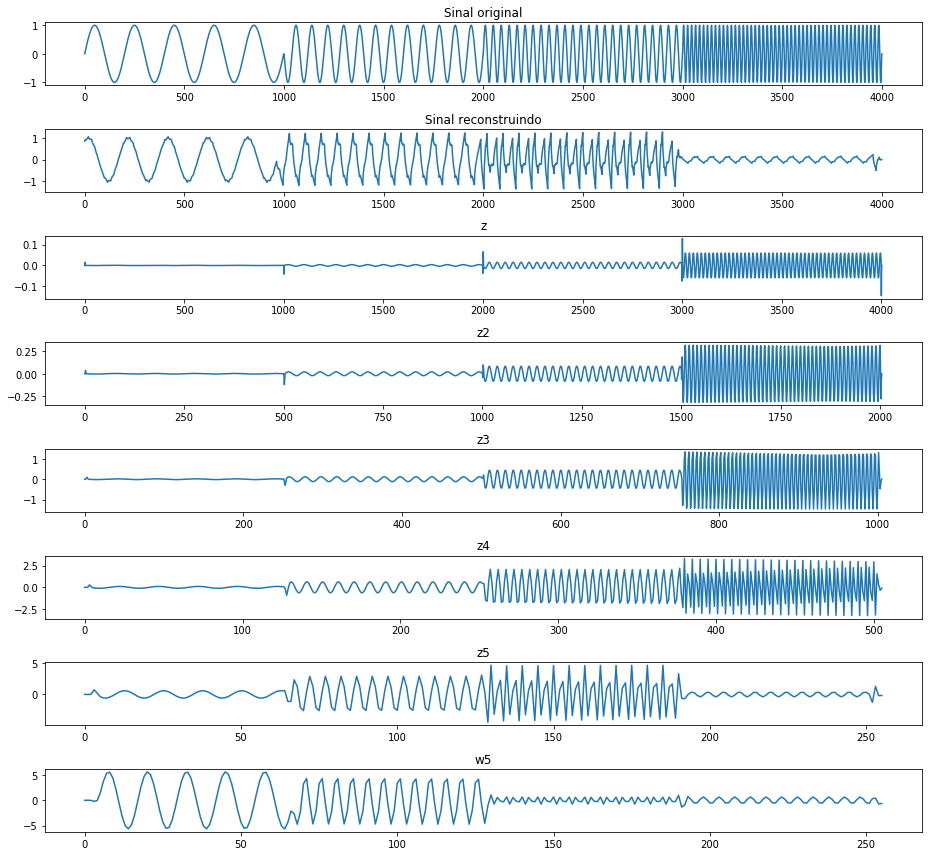

In [134]:
# coeficientes dos filtros
a = (1-np.sqrt(3))/(4*np.sqrt(2))
b = (3-np.sqrt(3))/(4*np.sqrt(2))
c = (3+np.sqrt(3))/(4*np.sqrt(2))
d = (1+np.sqrt(3))/(4*np.sqrt(2))


h0 = [a, b, c, d,]   #coeficientes passa-baixas de decomposição
h1 = [d, -c, b, -a]  #coeficientes passa-altas de decomposição
g0 = [d, c, b, a]    #coeficientes passa-baixas de decomposição
g1 = [-a, b, -c, d]  #coeficientes passa-altas de decomposição
ncoef = 4            #número de coeficientes para calcular o atraso na saída

# decomposição 1
z = np.convolve(x, h1)
w = np.convolve(x, h0)
# subamostragem
zd = z[0:len(z):2]
wd = w[0:len(w):2]

# decomposição 2
z2 = np.convolve(wd, h1)
w2 = np.convolve(wd, h0)
# subamostragem
z2d = z2[0:len(z2):2]
w2d = w2[0:len(w2):2]

# decomposição 3
z3 = np.convolve(w2d, h1)
w3 = np.convolve(w2d, h0)
# subamostragem
z3d = z3[0:len(z3):2]
w3d = w3[0:len(w3):2]

# decomposição 4
z4 = np.convolve(w3d, h1)
w4 = np.convolve(w3d, h0)
# subamostragem
z4d = z4[0:len(z4):2]
w4d = w4[0:len(w4):2]

# decomposição 5
z5 = np.convolve(w4d, h1)
w5 = np.convolve(w4d, h0)
# subamostragem
z5d = z5[0:len(z5):2]
w5d = w5[0:len(w5):2]

# Reconstrução 5
# subreamostragem
z5u = upfirdn([1], z5d, 2)
w5u = upfirdn([1], w5d, 2)

z5f = np.convolve(z5u,g1)
w5f = np.convolve(w5u,g0)

wx = z5f + w5f

Wx = []
for n in range(len(w4d)):
  Wx.append(wx[n+ncoef])

# Reconstrução 4
# subreamostragem
z4d = np.zeros(len(z4d))
z4u = upfirdn([1], z4d, 2)
w4u = upfirdn([1], Wx, 2)

z4f = np.convolve(z4u,g1)
w4f = np.convolve(w4u,g0)

wh = z4f + w4f

Wh = []
for n in range(len(w3d)):
  Wh.append(wh[n+ncoef])

# Reconstrução 3
# subreamostragem
z3d = np.zeros(len(z3d))
z3u = upfirdn([1], z3d, 2)
w3u = upfirdn([1], Wh, 2)

z3f = np.convolve(z3u,g1)
w3f = np.convolve(w3u,g0)

wk = z3f + w3f

Wk = []
for n in range(len(w2d)):
  Wk.append(wk[n+ncoef])

# Reconstrução 2
# subreamostragem
z2d = np.zeros(len(z2d))
z2u = upfirdn([1], z2d, 2)
w2u = upfirdn([1], Wk, 2)

z2f = np.convolve(z2u,g1)
w2f = np.convolve(w2u,g0)

wr = z2f + w2f

Wr = []
for n in range(len(wd)):
  Wr.append(wr[n+ncoef])

# Reconstrução 1
# subreamostragem
zd = np.zeros(len(zd))
zu = upfirdn([1], zd, 2)
wu = upfirdn([1], Wr, 2)

zf = np.convolve(zu,g1)
wf = np.convolve(wu,g0)

y = zf + wf

Y = []
for n in range(len(x)):
  Y.append(y[n+ncoef])


# Plotando
plt.rcParams["figure.figsize"] = (13, 12)
plt.subplot(8, 1, 1)
plt.title("Sinal original")
plt.plot(x);
plt.subplot(8, 1, 2)
plt.title("Sinal reconstruindo")
plt.plot(Y);
plt.subplot(8, 1, 3)
plt.title("z")
plt.plot(z);
plt.subplot(8, 1, 4)
plt.title("z2")
plt.plot(z2);
plt.subplot(8, 1, 5)
plt.title("z3")
plt.plot(z3);
plt.subplot(8, 1, 6)
plt.title("z4")
plt.plot(z4);
plt.subplot(8, 1, 7)
plt.title("z5")
plt.plot(z5);
plt.subplot(8, 1, 8)
plt.title("w5")
plt.plot(w5);
plt.tight_layout()